<a href="https://colab.research.google.com/github/alswnsdlf/sec2_project/blob/main/ai06_project2_%EB%AF%BC%EC%A4%80%EC%9D%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%%capture
import sys

if 'google.colab' in sys.modules:
    # Install packages in Colab
    !pip install category_encoders==2.*
    !pip install eli5
    !pip install pandas-profiling==2.*
    !pip install pdpbox
    !pip install shap

In [4]:
## 포루투갈의 은행기관의 데이터셋입니다.

In [5]:
## 목표는 고객의 정기예금 가입여부를 예측하는 것입니다. 따라서, 타겟을 deposit 가입 여부로 정했습니다.

In [6]:
## age: 나이
## job: 직업
## marital: 결혼상태
## education: 직업
## default: 신용불량 여부
## balance: 잔고
## housing: 집 대출 유무
## loan: 개인적 대출 유무
## contact: 연락 방법
## month, day: 마지막으로 연락한 달
## duration: 마지막 통화 시간(초 단위), duration 이 0이면 타겟은 no
## campaign: 연락 횟수	
## pdays: 마지막 연락 후에 지난 일수
## previous: 지난 캠페인에 연락했던 횟수
## poutcome: 지난 캠페인의 결과
## deposit: 타겟, 정기예금 가입 여부

In [7]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score

In [8]:
from google.colab import files
myfile = files.upload()

Saving bank.xlsx to bank.xlsx


In [9]:
df = pd.read_excel("bank.xlsx")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [10]:
df.duplicated().sum()

0

In [11]:
def dd(x):
  if x == 'yes':
    return 1
  else :
    return 0

df['deposit'] = df['deposit'].apply(dd)

In [12]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,0
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,0
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,0
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,0


In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [14]:
df.isna().sum().sort_values()

age          0
previous     0
pdays        0
campaign     0
duration     0
month        0
day          0
poutcome     0
contact      0
housing      0
balance      0
default      0
education    0
marital      0
job          0
loan         0
deposit      0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 1.4+ MB


In [16]:
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
from category_encoders import OneHotEncoder
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from eli5.sklearn import PermutationImportance
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [19]:
target = 'deposit'

In [20]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, train_size=0.8, test_size=0.2, random_state=2)
train.shape, test.shape

((8929, 17), (2233, 17))

In [21]:
train, val = train_test_split(train, test_size=0.2, stratify=train[target], random_state=2)
train.shape, val.shape, test.shape

((7143, 17), (1786, 17), (2233, 17))

In [22]:
features = train.columns.drop([target])
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

In [23]:
X_train = train[features]
X_train.value_counts(normalize=True)

age  job         marital   education  default  balance  housing  loan  contact    day  month  duration  campaign  pdays  previous  poutcome
95   retired     divorced  primary    no       2282     no       no    telephone  21   apr    207       17        -1     0         unknown     0.00014
34   management  single    tertiary   no       6766     no       no    cellular   28   aug    210       5         -1     0         unknown     0.00014
                                               575      no       no    cellular   9    mar    116       1         -1     0         unknown     0.00014
                                               612      no       no    cellular   30   apr    192       1         -1     0         unknown     0.00014
                                               747      no       no    cellular   31   aug    72        2          98    1         failure     0.00014
                                                                                                         

In [24]:
y_train = train[target]
y_train.value_counts(normalize=True)

0    0.52485
1    0.47515
Name: deposit, dtype: float64

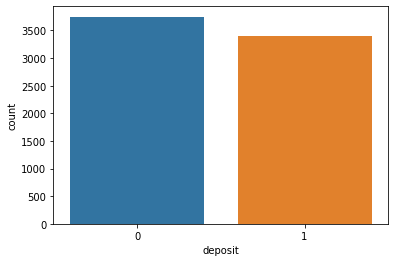

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(x=y_train);

In [26]:
## 정기예금에 가입하지 않는다는 값이 더 높으므로, 베이스모델은 0.52485

In [27]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
df['job'] = labelencoder_X.fit_transform(df['job'])
df['marital'] = labelencoder_X.fit_transform(df['marital']) 
df['education'] = labelencoder_X.fit_transform(df['education']) 
df['default'] = labelencoder_X.fit_transform(df['default']) 
df['housing'] = labelencoder_X.fit_transform(df['housing']) 
df['loan'] = labelencoder_X.fit_transform(df['loan']) 
df['contact'] = labelencoder_X.fit_transform(df['contact']) 
df['month'] = labelencoder_X.fit_transform(df['month'])
df['poutcome'] = labelencoder_X.fit_transform(df['poutcome']) 

In [28]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0


In [29]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, train_size=0.8, test_size=0.2, random_state=2)
train.shape, test.shape

((8929, 17), (2233, 17))

In [30]:
train, val = train_test_split(train, test_size=0.2, stratify=train[target], random_state=2)
train.shape, val.shape, test.shape

((7143, 17), (1786, 17), (2233, 17))

In [31]:
features = train.columns.drop([target])
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

In [32]:
from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

Decision Tree

In [33]:
pipe = make_pipeline(
    OrdinalEncoder(), 
    DecisionTreeClassifier(max_depth=5, random_state=2)
)

pipe.fit(X_train, y_train)
print('검증 정확도', pipe.score(X_val, y_val))

검증 정확도 0.8247480403135499


In [34]:
from sklearn.metrics import classification_report
y_pred = pipe.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       937
           1       0.80      0.84      0.82       849

    accuracy                           0.82      1786
   macro avg       0.82      0.83      0.82      1786
weighted avg       0.83      0.82      0.82      1786



In [35]:
F1_score = f1_score(y_pred, y_val)
F1_score

0.8208357183743561

Decision tree 테스트 점수

In [36]:
f1_score(y_test, pipe.predict(X_test))

0.7994428969359332

In [37]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor
from scipy.stats import randint, uniform

Random Forest

In [114]:
pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(random_state=10)
)

dists = {
    'simpleimputer__strategy': ['mean', 'median'], 
    'randomforestclassifier__n_estimators': randint(10, 140, 200), 
    'randomforestclassifier__max_depth': [5, 10, 15, 20, 100, 200, None], 
    'randomforestclassifier__max_features': uniform(0, 1)
}

clf = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=500, 
    cv=3,
    scoring='neg_mean_absolute_error',
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, y_train);

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 29.6min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 45.4min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 54.3min finished


In [115]:
print('최적 하이퍼파라미터: ', clf.best_params_)
print('MAE: ', -clf.best_score_)

최적 하이퍼파라미터:  {'randomforestclassifier__max_depth': 20, 'randomforestclassifier__max_features': 0.9172004846116927, 'randomforestclassifier__n_estimators': 332, 'simpleimputer__strategy': 'median'}
MAE:  0.15693686126277476


In [116]:
pipe = clf.best_estimator_
y_pred = pipe.predict(X_val)

In [117]:
F1_score = f1_score(y_pred, y_val)
F1_score

0.8533487297921477

Random forest 테스트 점수

In [118]:
f1_score(y_test, pipe.predict(X_test))

0.8381395348837208

In [125]:
y_pred = pipe.predict(X_val)
print('검증 정확도: ', accuracy_score(y_val, y_pred))

print(classification_report(y_pred, y_val))

검증 정확도:  0.8706606942889138
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       934
           1       0.87      0.86      0.86       852

    accuracy                           0.87      1786
   macro avg       0.87      0.87      0.87      1786
weighted avg       0.87      0.87      0.87      1786



Xgboost

In [119]:
import time

import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV


clf = xgb.XGBClassifier()

param_grid = {
        'silent': [False],
        'max_depth': [5, 200, 300, 500, 1000],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3, 0.5],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1, 2],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2],
        'min_child_weight': [0.5, 1, 3, 5, 7, 10, 20, 100],
        'gamma': [0, 0.25, 0.5, 1, 10],
        'reg_lambda': [0.1, 1, 5, 10, 50, 100, 500],
        'n_estimators': [100, 500]}

fit_params = {'eval_metric': 'mlogloss',
              'early_stopping_rounds': 10,
              'eval_set': [(X_val, y_val)]}

rs_clf = RandomizedSearchCV(clf, param_grid, n_iter=500,
                            n_jobs=-1, verbose=1, cv=2,
                            refit=True,
                            scoring='neg_log_loss', random_state=100)
print("Randomized search..")
search_time_start = time.time()
rs_clf.fit(X_train, y_train)
print("Randomized search time:", time.time() - search_time_start)

best_score = rs_clf.best_score_
best_params = rs_clf.best_params_
print("Best score: {}".format(best_score))
print("Best params: ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

Randomized search..
Fitting 2 folds for each of 500 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:   48.5s
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 454 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 804 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 11.8min finished


Randomized search time: 713.9621679782867
Best score: -0.3588797097563696
Best params: 
colsample_bylevel: 0.7
colsample_bytree: 0.4
gamma: 10
learning_rate: 0.3
max_depth: 200
min_child_weight: 7
n_estimators: 500
reg_lambda: 0.1
silent: False
subsample: 0.9


In [121]:
print('최적 하이퍼파라미터: ', rs_clf.best_params_)
print('MAE: ', -rs_clf.best_score_)

최적 하이퍼파라미터:  {'subsample': 0.9, 'silent': False, 'reg_lambda': 0.1, 'n_estimators': 500, 'min_child_weight': 7, 'max_depth': 200, 'learning_rate': 0.3, 'gamma': 10, 'colsample_bytree': 0.4, 'colsample_bylevel': 0.7}
MAE:  0.3588797097563696


In [126]:
pipe = rs_clf.best_estimator_
y_pred = pipe.predict(X_val)

In [127]:
F1_score = f1_score(y_pred, y_val)
F1_score

0.8641975308641975

In [128]:
y_pred = pipe.predict(X_val)
print('검증 정확도: ', accuracy_score(y_val, y_pred))

print(classification_report(y_pred, y_val))

검증 정확도:  0.8706606942889138
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       934
           1       0.87      0.86      0.86       852

    accuracy                           0.87      1786
   macro avg       0.87      0.87      0.87      1786
weighted avg       0.87      0.87      0.87      1786



Xgboost 테스트 점수

In [129]:
f1_score(y_test, pipe.predict(X_test))

0.8455436304246384

In [97]:
permuter = PermutationImportance(
    pipe.named_steps['xgb'],
    scoring='accuracy', 
    n_iter=5,
    random_state=2
)

In [98]:
X_train_transformed = pipe.named_steps['preprocessing'].transform(X_train)
permuter.fit(X_train_transformed, y_train)

PermutationImportance(cv='prefit',
                      estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=0.8,
                                              colsample_bynode=1,
                                              colsample_bytree=1.0, gamma=0,
                                              learning_rate=0.1,
                                              max_delta_step=0, max_depth=15,
                                              min_child_weight=1.0,
                                              missing=None, n_estimators=100,
                                              n_jobs=1, nthread=None,
                                              objective='binary:logistic',
                                              random_state=0, reg_alpha=0,
                                              reg_lambda=10, scale_pos_weight=1,
                                              seed=None, silent=False,
            

In [99]:
feature_names = X_train.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

default      0.000140
loan         0.005908
previous     0.006804
marital      0.008988
education    0.011480
job          0.016800
campaign     0.018956
poutcome     0.020748
housing      0.022120
age          0.037211
pdays        0.040039
balance      0.040739
contact      0.042503
day          0.050931
month        0.092370
duration     0.282962
dtype: float64

In [52]:
from pdpbox.pdp import pdp_isolate, pdp_plot
from pdpbox import pdp

In [53]:
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='xgboost')

In [54]:
import eli5
from eli5.sklearn import PermutationImportance

In [55]:
import sklearn
import xgboost
import shap

In [56]:
from category_encoders import OrdinalEncoder
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

In [109]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot
from category_encoders import OrdinalEncoder
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

In [94]:
encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train) # 학습데이터
X_val_encoded = encoder.transform(X_val) # 검증데이터

boosting = XGBRegressor(
    n_estimators=1000,
    objective='reg:squarederror', # default
    learning_rate=0.2,
    n_jobs=-1
)

eval_set = [(X_train_encoded, y_train), 
            (X_val_encoded, y_val)]

boosting.fit(X_train_encoded, y_train, 
          eval_set=eval_set,
          early_stopping_rounds=50
         )

[0]	validation_0-rmse:0.466611	validation_1-rmse:0.466533
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:0.442344	validation_1-rmse:0.44266
[2]	validation_0-rmse:0.424988	validation_1-rmse:0.425162
[3]	validation_0-rmse:0.410474	validation_1-rmse:0.410764
[4]	validation_0-rmse:0.400382	validation_1-rmse:0.400683
[5]	validation_0-rmse:0.391087	validation_1-rmse:0.390397
[6]	validation_0-rmse:0.385047	validation_1-rmse:0.384604
[7]	validation_0-rmse:0.380247	validation_1-rmse:0.379345
[8]	validation_0-rmse:0.375824	validation_1-rmse:0.37476
[9]	validation_0-rmse:0.372476	validation_1-rmse:0.371455
[10]	validation_0-rmse:0.370005	validation_1-rmse:0.368473
[11]	validation_0-rmse:0.366013	validation_1-rmse:0.364344
[12]	validation_0-rmse:0.363382	validation_1-rmse:0.360619
[13]	validation_0-rmse:0.361333	validation_1-rmse:0.358852
[14]	validation_0-rmse:0.35

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.2, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=-1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [95]:
y_pred = boosting.predict(X_val_encoded)
print('R^2', r2_score(y_val, y_pred))

R^2 0.5797493644724836


In [60]:
from sklearn.linear_model import LinearRegression
from category_encoders import TargetEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [61]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [62]:
shap.initjs();
shap.models.Model

shap.models._model.Model

In [66]:
model = xgboost.XGBRegressor().fit(X_test, y_test)

[05:45:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [148]:
from sklearn.linear_model import LinearRegression

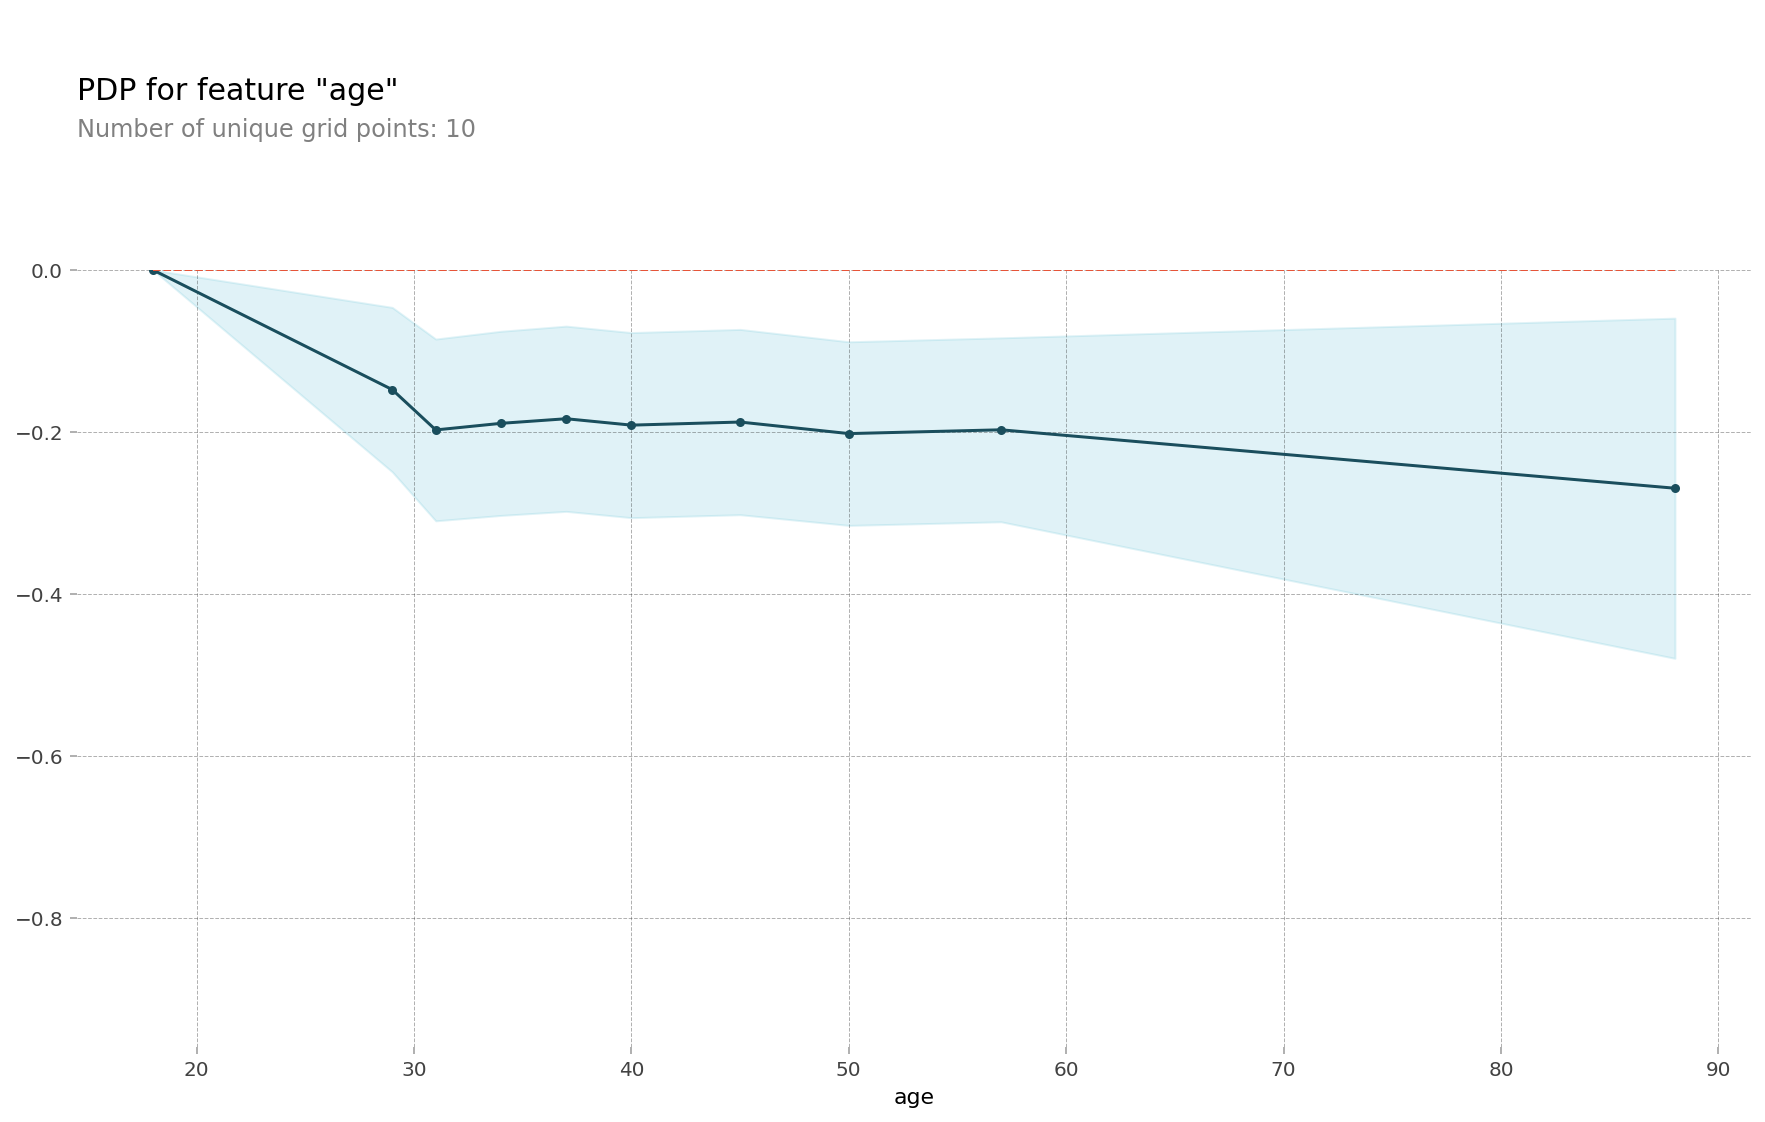

In [81]:
plt.rcParams['figure.dpi'] = 144
features = 'age'

isolated = pdp_isolate(
    model=boosting, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature,
    grid_type='percentile', 
    num_grid_points=10
)
pdp_plot(isolated, feature_name=feature);

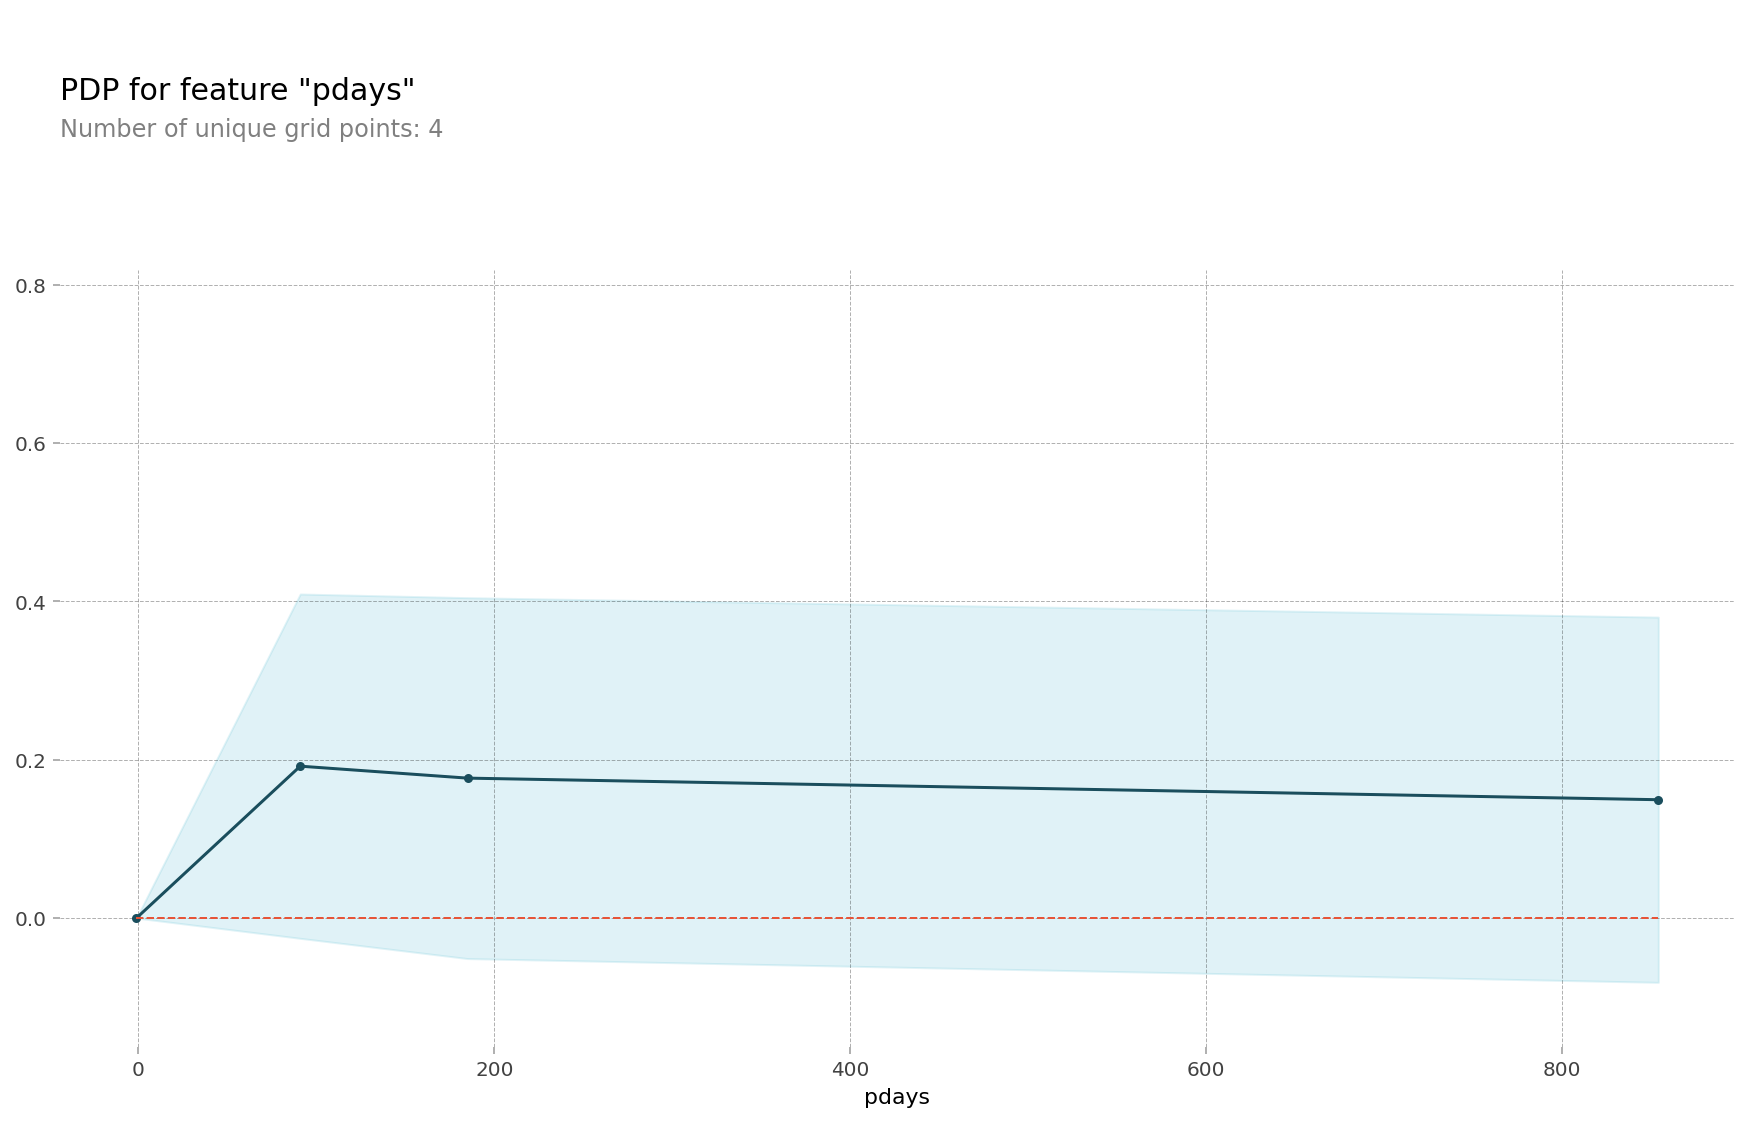

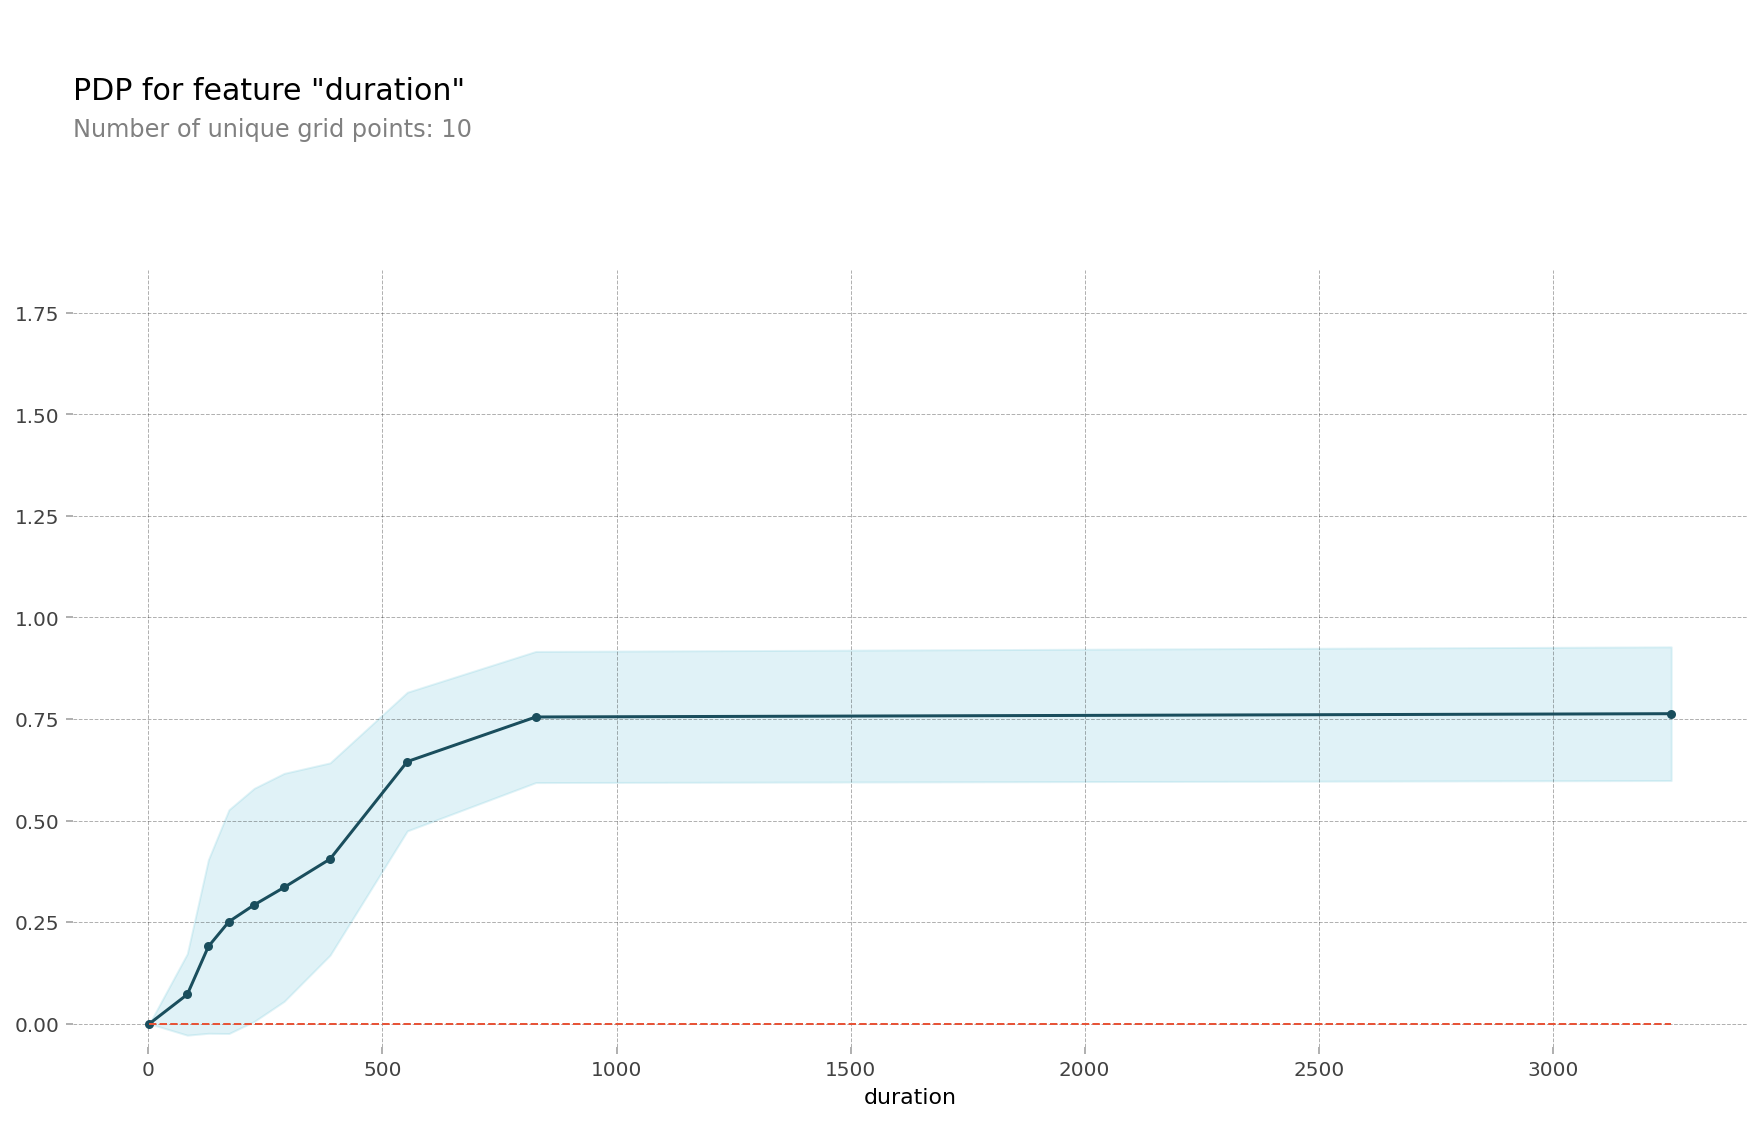

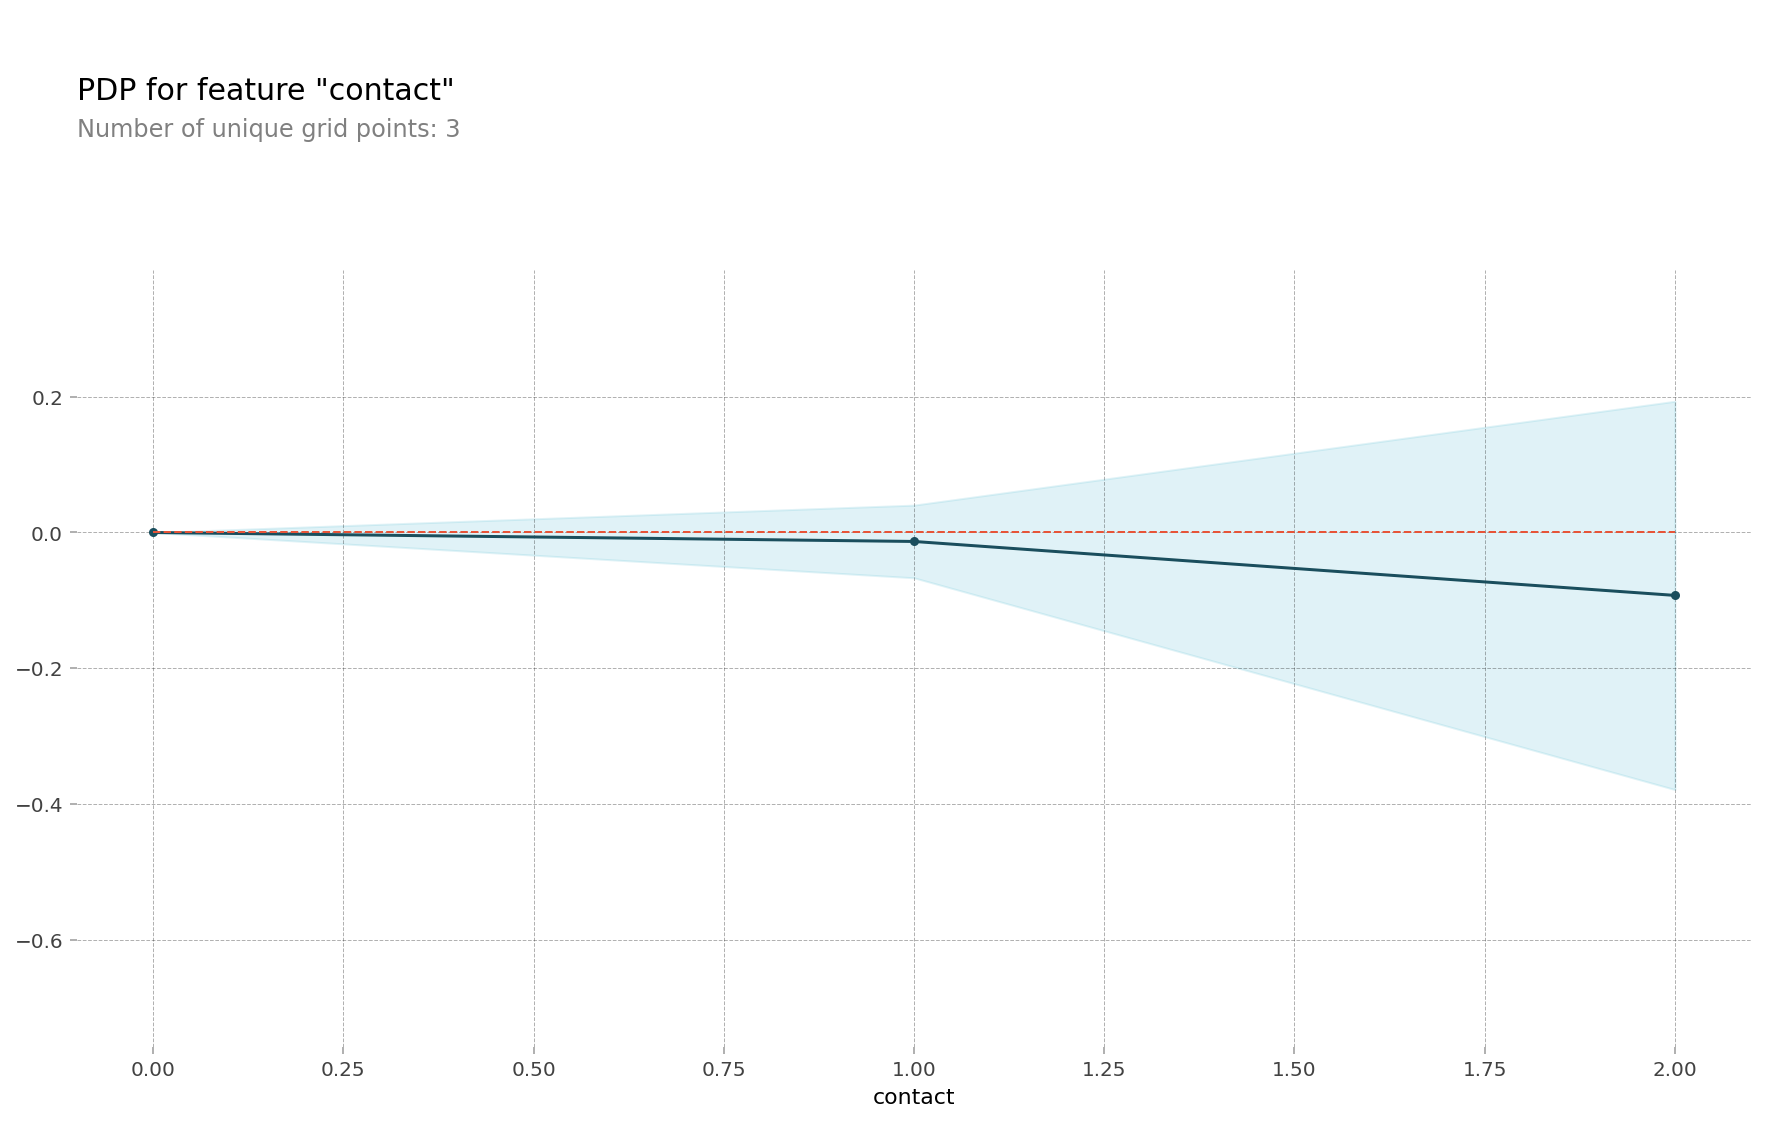

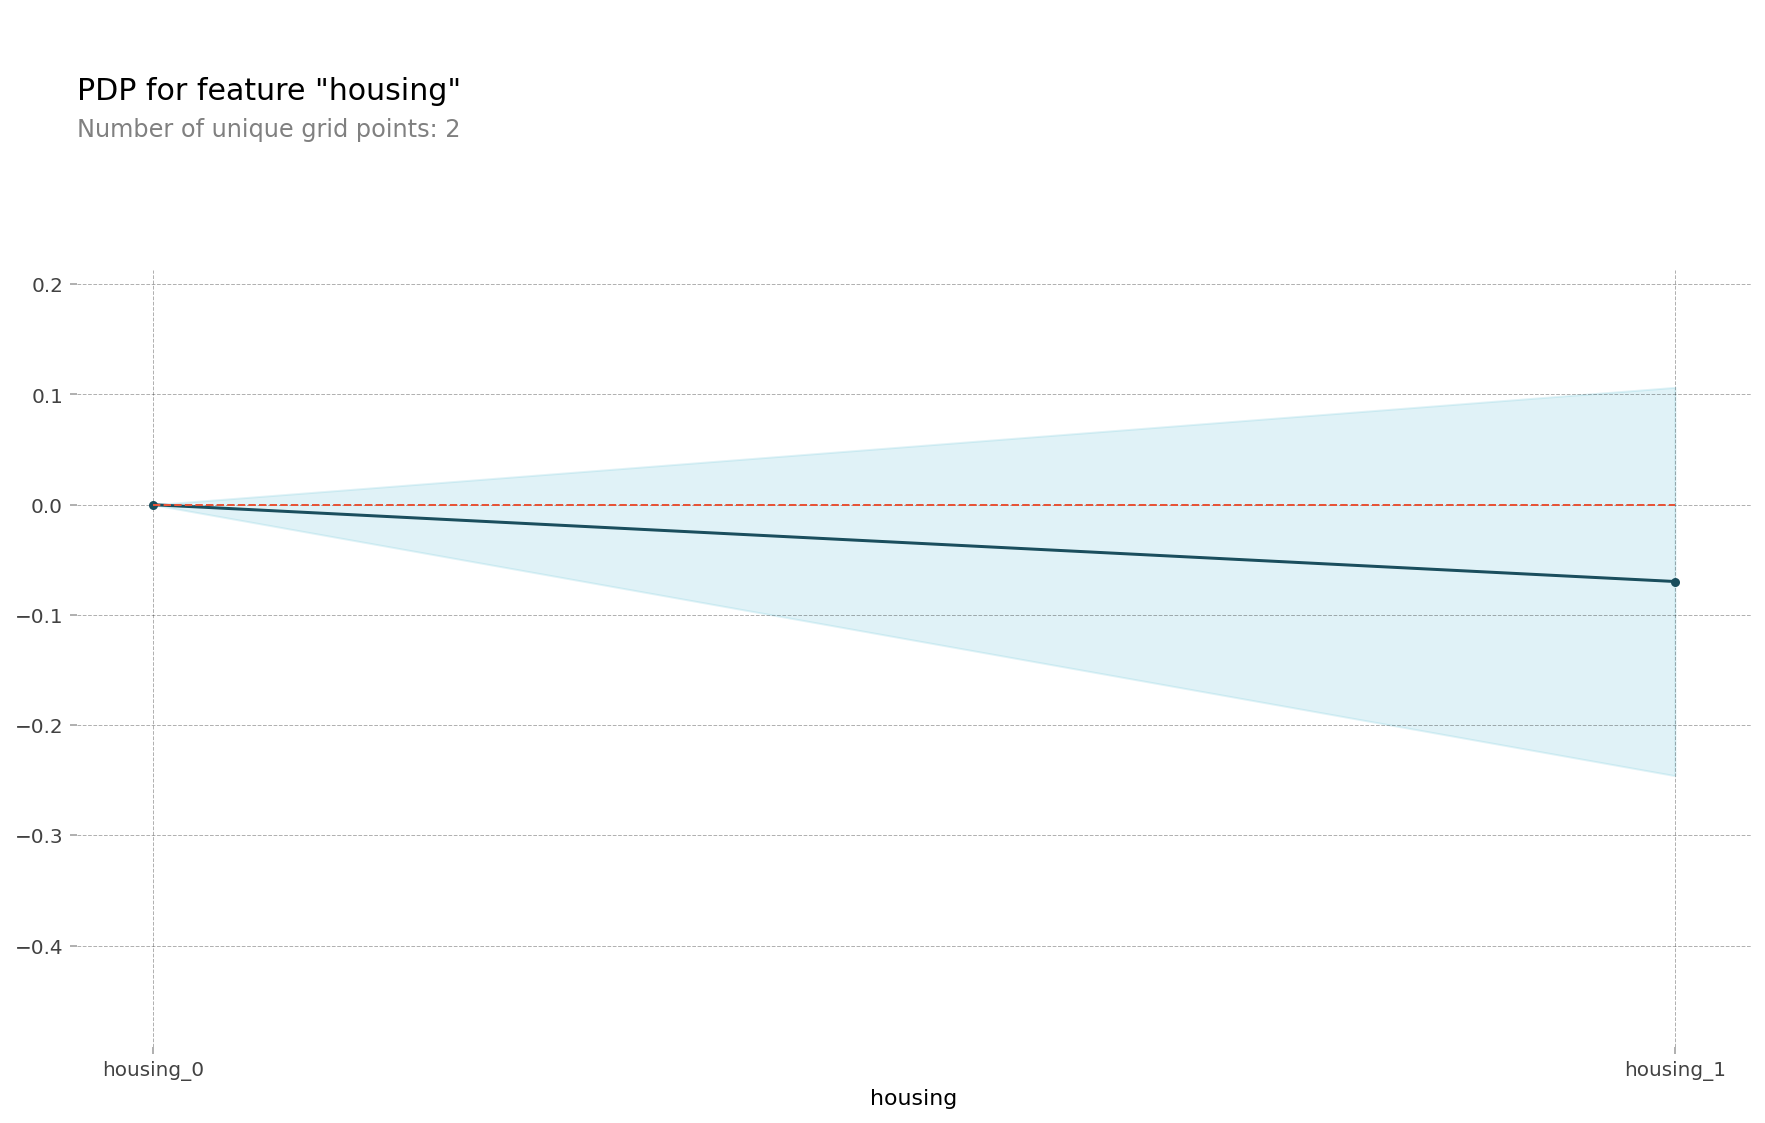

In [149]:
plt.rcParams['figure.dpi'] = 144

for i in ['pdays', 'duration', 'contact', 'housing']:
    feature = i
    isolated = pdp_isolate(
        model=model, 
        dataset=X_train, 
        model_features=X_train.columns, 
        feature=feature,
        grid_type='percentile', # default='percentile', or 'equal'
        num_grid_points=10 # default=10
    )
    pdp_plot(isolated, feature_name=feature);

In [91]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

In [131]:
features = ['duration', 'age']

interaction = pdp_interact(
    model=boosting, 
    dataset=X_val_encoded,
    model_features=X_val.columns, 
    features=features
)

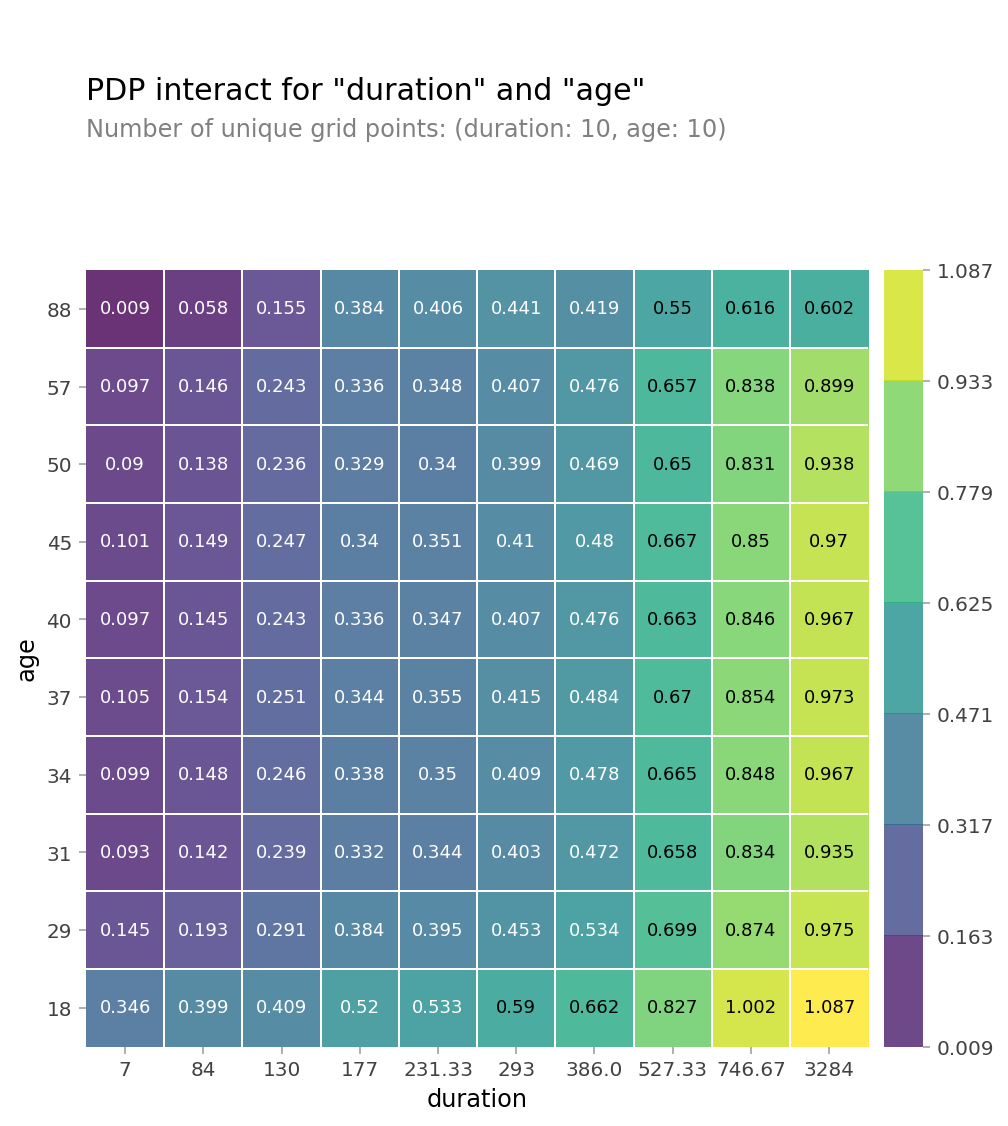

In [132]:
pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features);

In [133]:
interaction.pdp

,duration,age,preds
0,7.0,18.0,0.345703
1,7.0,29.0,0.144913
2,7.0,31.0,0.093119
3,7.0,34.0,0.099348
4,7.0,37.0,0.105041
...,...,...,...
95,3284.0,40.0,0.966625
96,3284.0,45.0,0.970446
97,3284.0,50.0,0.937516
98,3284.0,57.0,0.898938


In [140]:
pdp = interaction.pdp.pivot_table(
    values='preds',
    columns=features[0], 
    index=features[1]
)[::-1]

In [141]:
pdp = pdp.drop(columns=[7.000000, 3284.000000])
pdp

duration,84.000000,130.000000,177.000000,231.333333,293.000000,386.000000,527.333333,746.666667
age,,,,,,,,
88.0,0.057573,0.155286,0.384031,0.405998,0.440886,0.419408,0.550452,0.616499
57.0,0.145604,0.243316,0.336251,0.347541,0.406853,0.476319,0.657288,0.838319
50.0,0.138164,0.235876,0.328811,0.340102,0.399413,0.468879,0.649848,0.830879
45.0,0.149092,0.246804,0.339739,0.351030,0.410341,0.479807,0.666619,0.850036
40.0,0.145271,0.242983,0.335918,0.347209,0.406520,0.475986,0.662798,0.846215
37.0,0.153540,0.251253,0.344188,0.355478,0.414790,0.483578,0.670391,0.853807
34.0,0.147847,0.245559,0.338495,0.349785,0.409097,0.477885,0.664697,0.848114
31.0,0.141618,0.239331,0.332266,0.343556,0.402868,0.471657,0.658469,0.834066
29.0,0.193413,0.291125,0.384060,0.395351,0.453109,0.533665,0.698612,0.874209


In [138]:
import plotly.graph_objs as go
surface = go.Surface(
    x=pdp.columns, 
    y=pdp.index, 
    z=pdp.values
)


layout = go.Layout(
    scene=dict(
        xaxis=dict(title=features[0]), 
        yaxis=dict(title=features[1]), 
        zaxis=dict(title=target)
    )
)

fig = go.Figure(surface, layout)
fig.show()

In [142]:
features = ['duration', 'pdays']

interaction = pdp_interact(
    model=boosting, 
    dataset=X_val_encoded,
    model_features=X_val.columns, 
    features=features
)

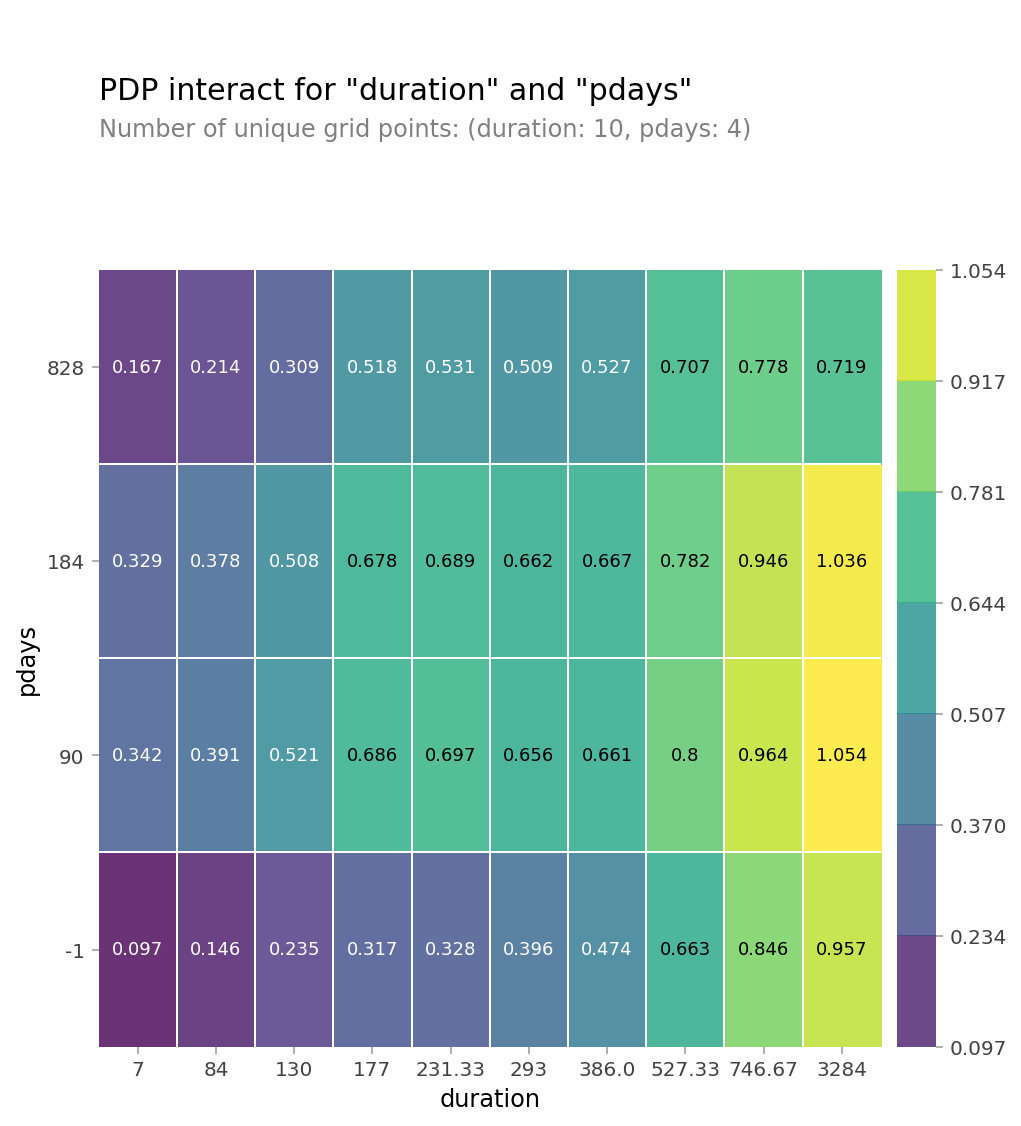

In [143]:
pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features);

In [144]:
interaction.pdp

,duration,pdays,preds
0,7.000000,-1.0,0.096825
1,7.000000,90.0,0.342203
2,7.000000,184.0,0.328631
3,7.000000,828.0,0.167020
4,84.000000,-1.0,0.145948
5,84.000000,90.0,0.391326
6,84.000000,184.0,0.377753
7,84.000000,828.0,0.213905
8,130.000000,-1.0,0.234506
9,130.000000,90.0,0.521117


In [145]:
pdp = interaction.pdp.pivot_table(
    values='preds',
    columns=features[0], 
    index=features[1]
)[::-1]

In [147]:
pdp = pdp.drop(columns=[7.000000, 3284.000000])
pdp

duration,84.000000,130.000000,177.000000,231.333333,293.000000,386.000000,527.333333,746.666667
pdays,,,,,,,,
828.0,0.213905,0.309273,0.517949,0.531111,0.509048,0.527019,0.707407,0.777545
184.0,0.377753,0.507545,0.678237,0.689471,0.662344,0.667251,0.781814,0.946266
90.0,0.391326,0.521117,0.686052,0.697286,0.656490,0.661398,0.799896,0.964348
-1.0,0.145948,0.234506,0.317033,0.328267,0.396373,0.473712,0.663096,0.846036


In [72]:
row = X_test.iloc[:500]
row.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
10772,45,4,1,2,0,2220,1,0,0,11,5,128,2,-1,0,3
2914,36,1,2,1,0,3623,0,0,2,12,9,71,1,378,1,2
6041,37,4,1,0,0,1506,0,0,0,2,9,101,3,80,3,2
3926,65,0,1,1,0,952,0,0,0,6,11,255,1,96,1,2
866,37,4,1,2,0,40,0,0,0,27,1,1033,4,-1,0,3


In [73]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row
)

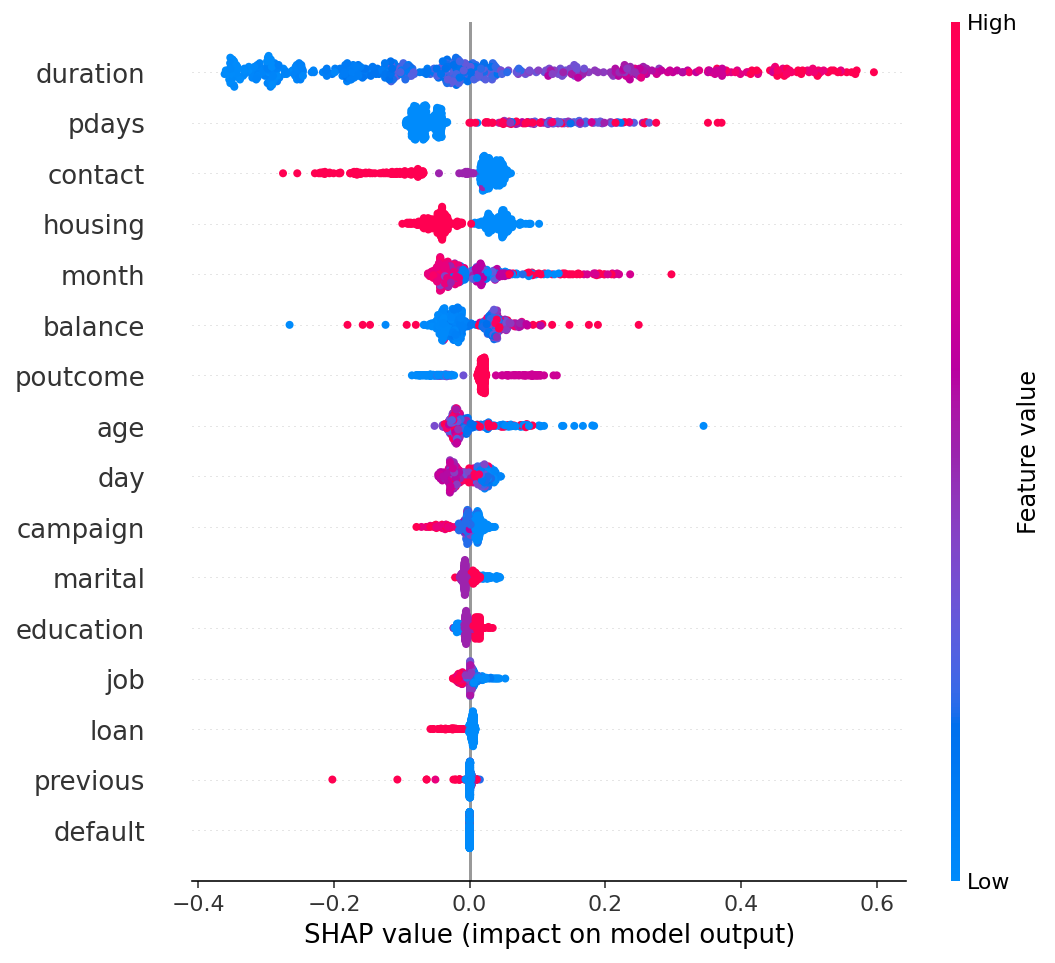

In [74]:
shap_values = explainer.shap_values(X_test.iloc[:500])
shap.summary_plot(shap_values, X_test.iloc[:500])

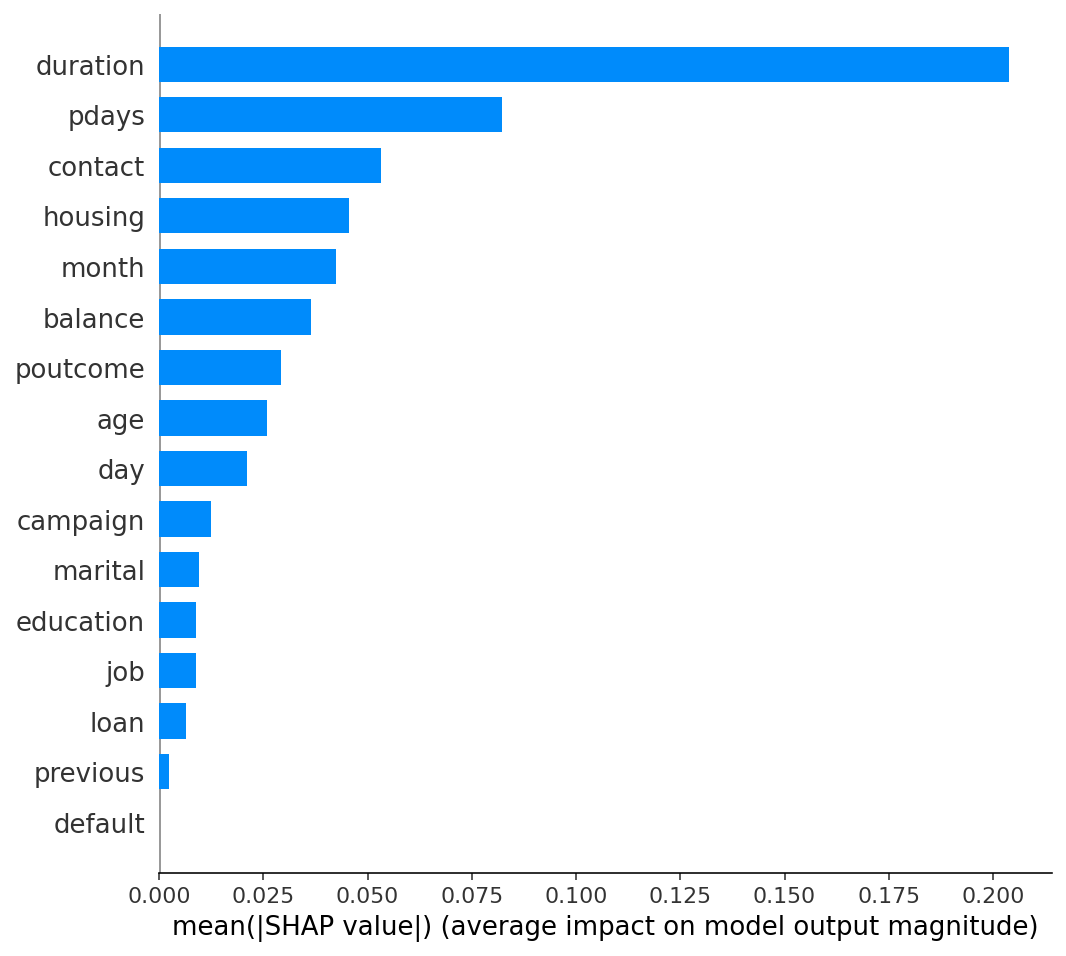

In [75]:
shap.initjs()
shap_values=explainer.shap_values(row)
shap.summary_plot(shap_values, row, plot_type="bar")

In [84]:
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

Weight,Feature
0.2687 ± 0.0037,duration
0.0920 ± 0.0040,month
0.0497 ± 0.0066,pdays
0.0438 ± 0.0028,contact
0.0406 ± 0.0035,day
0.0295 ± 0.0027,balance
0.0274 ± 0.0026,age
0.0213 ± 0.0011,poutcome
0.0142 ± 0.0028,housing
0.0131 ± 0.0023,campaign


In [ ]:
## 통화 시간이 길수록 정기예금 가입